# 01 - View Preprocessing

This notebook visualizes and aids the design of the preprocessing steps of refining the Diabetes Dataset.

This notebook does **NOT** perform the actual preprocessing; that is handled by `build_dataset.py` 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import os
import sys
import pprint

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
plt.style.use('ggplot')
sns.set()
# plt.style.use('seaborn')
mpl.style.use('seaborn')

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999
pd.options.display.max_rows = 500
np.set_printoptions(precision=6)

DATA_PATH = '../data/'
pp = pprint.PrettyPrinter(indent=4)

print(pd.__version__)

# UGLY HACK - not for production
sys.path.append('..')

0.23.4


## Features

* IGNORE - won't be used as inputs
* CONTINUOUS - all are good vars, keep all
* OUTPUT - 'readmitted'
* CATEGORICAL - to be determined through analysis

In [3]:
from build_dataset import IGNORE_FEATURES, CONTINOUS_FEATURES, OUTPUT_FEATURES

print('Continous:')
pp.pprint(CONTINOUS_FEATURES)

print()

Continous:
[   'age',
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses']



## Read CSV and Recode Output

In [4]:
FILE = os.path.join(DATA_PATH, 'raw', 'diabetic_data.csv')

raw_df = pd.read_csv(FILE, na_values='?', low_memory=False)
raw_df['readmitted'] = raw_df['readmitted'].replace({'NO': '>30'})

print(raw_df.shape)
display(raw_df.head(10))

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,NaN,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,NaN,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,NaN,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,NaN,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30


## Drop Rows

1. Subjects with multiple encounters (take first)
1. Missing data
    - missing gender
    - missing diag_1 (need at least one diagnosis)
1. Died during visit - {'discharge_disposition_id': 11}

In [5]:
from build_dataset import drop_rows

dropped_df = drop_rows(raw_df)
print(raw_df.shape)
print(dropped_df.shape)

(101766, 50)
(70420, 50)


## Recode Diagnosis

Features diag_1,2,3 have over 700 unique ICD codes.

[Table 2](https://www.hindawi.com/journals/bmri/2014/781670/tab2/) of the paper accompanying the dataset conveniently groups the ICD codes into 9 groups - a much more manageable number of categories.


In [6]:
from build_dataset import recode_diagnoses

recode_diag_df = recode_diagnoses(dropped_df)
display(recode_diag_df.head(10))

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,Diabetes,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,Other,Diabetes,Other,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,Other,Diabetes,Other,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,Other,Diabetes,Circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,NaN,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,NaN,70,1,21,0,0,0,Circulatory,Circulatory,Other,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,NaN,73,0,12,0,0,0,Circulatory,Respiriatory,Diabetes,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,NaN,68,2,28,0,0,0,Circulatory,Circulatory,Other,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,InternalMedicine,33,3,18,0,0,0,Circulatory,Neoplasms,Respiriatory,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30


## Recode Admission and Discharge IDs

In [7]:
from build_dataset import recode_admission_discharge

id_vars = ['admission_type_id','discharge_disposition_id','admission_source_id']

display(recode_diag_df[id_vars].nunique())

recode_id_df = recode_admission_discharge(recode_diag_df)

print()
display(recode_id_df[id_vars].nunique())


admission_type_id            8
discharge_disposition_id    23
admission_source_id         17
dtype: int64

admission_type_id            4
discharge_disposition_id    22
admission_source_id         15
dtype: int64

## Cast Age Ranges as Numeric

In [8]:
from build_dataset import age_to_numeric

age_df = age_to_numeric(recode_id_df)

display(age_df.dtypes['age'])
display(age_df.head())


dtype('int64')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,NaN,5,18,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,Diabetes,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
1,149190,55629189,Caucasian,Female,15,NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,Other,Diabetes,Other,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,Other,Diabetes,Other,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
3,500364,82442376,Caucasian,Male,35,NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,Other,Diabetes,Circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
4,16680,42519267,Caucasian,Male,45,NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30


## Categorical Features

In [21]:
from build_dataset import identify_imbalanced_categories, PCT_THRESHOLD


categorical_features_all = [var for var in raw_df.columns
                                if var not in IGNORE_FEATURES
                                and var not in CONTINOUS_FEATURES
                                and var not in OUTPUT_FEATURES]

imbalanced_features = identify_imbalanced_categories(age_df, categorical_features_all, PCT_THRESHOLD)
print('Imbalanced:')
print(imbalanced_features)

CATEGORICAL_FEATURES = [var for var in categorical_features_all
                            if var not in imbalanced_features]
print('\nCategorical:')
print(CATEGORICAL_FEATURES)

Imbalanced:
['max_glu_serum', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

Categorical:
['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed']


# Visualize

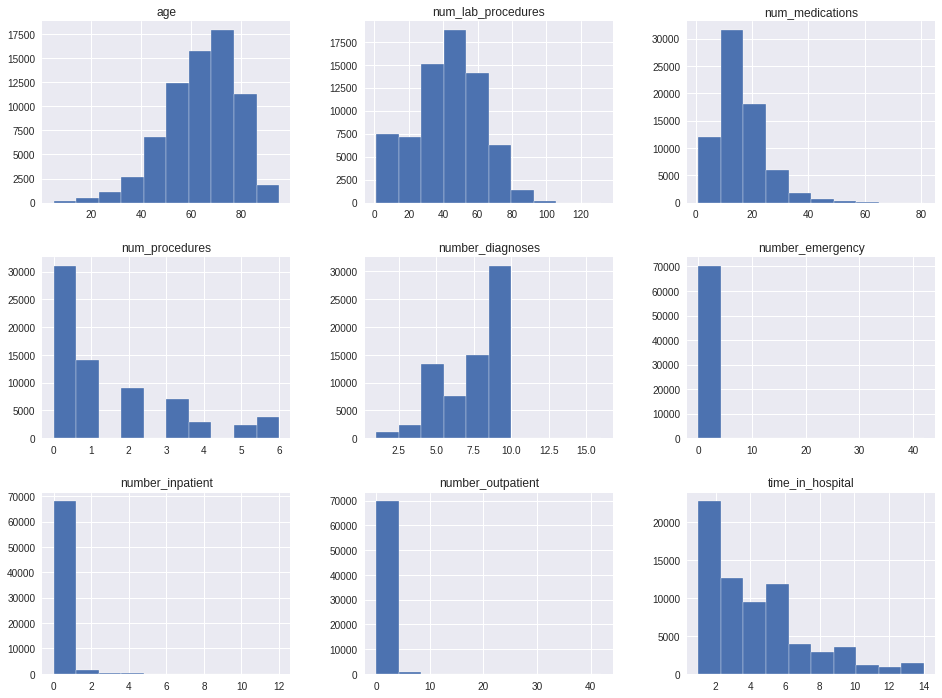

In [10]:
new_df = age_df.copy()

axes = new_df.hist(column=CONTINOUS_FEATURES, figsize=(16,12))

In [23]:
def display_categorical_features(df, features, ignore=None):
    for var in features:
        if var in ignore:
            continue
        print(f'\n{var}: {df[var].nunique(dropna=False)} unique values \n')
        display(df[var].value_counts(dropna=False).sort_index())
        print('-'*50)

In [24]:
display_categorical_features(new_df, 
                             features=CATEGORICAL_FEATURES + OUTPUT_FEATURES, 
                             ignore=[])


race: 6 unique values 



AfricanAmerican    12688
Asian                490
Caucasian          52660
Hispanic            1504
Other               1160
NaN                 1918
Name: race, dtype: int64

--------------------------------------------------

gender: 2 unique values 



Female    37466
Male      32954
Name: gender, dtype: int64

--------------------------------------------------

admission_type_id: 4 unique values 



1    48640
3    13829
4        9
5     7942
Name: admission_type_id, dtype: int64

--------------------------------------------------

discharge_disposition_id: 22 unique values 



1     44312
2      1538
3      8782
4       541
5       912
6      8288
7       408
8        73
9         9
10        6
      ...  
14      218
15       40
16        3
17        8
18     3251
22     1409
23      260
24       25
27        3
28       90
Name: discharge_disposition_id, Length: 22, dtype: int64

--------------------------------------------------

admission_source_id: 15 unique values 



1     21841
2       909
3       136
4      2540
5       513
6      1788
7     37559
8        11
9      5106
10        7
11        1
13        1
14        2
22        4
25        2
Name: admission_source_id, dtype: int64

--------------------------------------------------

diag_1: 9 unique values 



Circulatory        21497
Diabetes            5766
Digestive           6512
Genitourinary       3477
Injury              4702
Musculoskeletal     4071
Neoplasms           2658
Other              12172
Respiriatory        9565
Name: diag_1, dtype: int64

--------------------------------------------------

diag_2: 10 unique values 



Circulatory        22192
Diabetes            9707
Digestive           2872
Genitourinary       5379
Injury              1826
Musculoskeletal     1296
Neoplasms           1684
Other              18180
Respiriatory        6991
NaN                  293
Name: diag_2, dtype: int64

--------------------------------------------------

diag_3: 10 unique values 



Circulatory        20964
Diabetes           12576
Digestive           2717
Genitourinary       4094
Injury              1412
Musculoskeletal     1372
Neoplasms           1217
Other              20141
Respiriatory        4703
NaN                 1224
Name: diag_3, dtype: int64

--------------------------------------------------

A1Cresult: 4 unique values 



>7       2872
>8       6247
None    57545
Norm     3756
Name: A1Cresult, dtype: int64

--------------------------------------------------

metformin: 4 unique values 



Down        435
No        55489
Steady    13658
Up          838
Name: metformin, dtype: int64

--------------------------------------------------

glimepiride: 4 unique values 



Down        138
No        66708
Steady     3342
Up          232
Name: glimepiride, dtype: int64

--------------------------------------------------

glipizide: 4 unique values 



Down        375
No        61372
Steady     8098
Up          575
Name: glipizide, dtype: int64

--------------------------------------------------

glyburide: 4 unique values 



Down        419
No        62612
Steady     6772
Up          617
Name: glyburide, dtype: int64

--------------------------------------------------

pioglitazone: 4 unique values 



Down         81
No        65141
Steady     5020
Up          178
Name: pioglitazone, dtype: int64

--------------------------------------------------

rosiglitazone: 4 unique values 



Down         75
No        65748
Steady     4464
Up          133
Name: rosiglitazone, dtype: int64

--------------------------------------------------

insulin: 4 unique values 



Down       7370
No        34451
Steady    21775
Up         6824
Name: insulin, dtype: int64

--------------------------------------------------

change: 2 unique values 



Ch    31657
No    38763
Name: change, dtype: int64

--------------------------------------------------

diabetesMed: 2 unique values 



No     16822
Yes    53598
Name: diabetesMed, dtype: int64

--------------------------------------------------

readmitted: 2 unique values 



<30     6291
>30    64129
Name: readmitted, dtype: int64

--------------------------------------------------
